#### create training dataset from aeon raw data

In [ ]:
# exp 0.2
# solo BAA-1101818 (tail+ear painted)
# 2022-06-23 08:39:04.261089801	BAA-1101818	26.4	Enter 
# 2022-06-23 11:14:46.121759892	BAA-1101818	28.0	Exit
# 2022-06-24 09:32:37.183360100	BAA-1101818	26.9	Enter (ear repainted)
# 2022-06-24 12:29:54.365859985	BAA-1101818	27.8	Exit

# solo BAA-1101819
# 2022-06-21 13:28:10.593659878	BAA-1101819	25.4	Enter
# 2022-06-21 16:34:29.241280079	BAA-1101819	26.4	Exit

# multianimal BAA-1101818 and BAA-1101819
# 2022-06-22 10:40:00	        BAA-1101819	24.9	Enter
# 2022-06-22 13:29:04.050240040	BAA-1101818	28.4	Exit 
# 2022-06-23 11:24:23.876420021	BAA-1101819	25.6	Enter
# 2022-06-23 14:19:39.241819859	BAA-1101818	26.4	Exit

# exp 0.3
# multianimal BAA-1102505 and BAA-1102506
# 1904-01-03 22:03:16.696000000	BAA-1102505	20	Enter
# 1904-01-03 22:03:30.928000000	BAA-1102506	20	Enter
# 1904-01-03 23:57:31.952000000	BAA-1102505	20	Exit
# 1904-01-03 23:57:37.824000000	BAA-1102506	20	Exit



In [3]:
import pandas as pd
import aeon.io.api as aeon

from aeon.schema.dataset import exp02
from aeon.analysis.utils import *

# function to retrieve aeon data
def get_raw_tracking_data(root, subj_id, start, end):
    subj_video = aeon.load(root, exp02.CameraTop.Video, start=start, end=end)
    subj_pos = aeon.load(root, exp02.CameraTop.Position, start=start, end=end) 
    subj_data = pd.merge_asof(subj_video, subj_pos, left_index=True, right_index=True, direction="nearest", tolerance=pd.Timedelta("1ms"))[['x','y','id','area','_frame','_path']]
    subj_data.dropna(inplace=True)
    subj_data["id"] = subj_id
    return subj_data


In [4]:
root = "/ceph/aeon/aeon/data/raw/AEON2/experiment0.2/"
subject = aeon.load(root, exp02.ExperimentalMetadata.SubjectState, start=pd.Timestamp("2022-06-01"), end=pd.Timestamp("2022-12-31"))
subject = subject[subject.id.str.startswith("BAA")]
subject = subject[subject.event != "Remain"]
subject = visits(subject)
subject

,id,weight_enter,weight_exit,enter,exit,duration
0,BAA-1101818,26.2,26.70,2022-06-21 10:27:42.615139961,2022-06-21 13:15:50.564740181,0 days 02:48:07.949600220
1,BAA-1101819,25.4,26.40,2022-06-21 13:28:10.593659878,2022-06-21 16:34:29.241280079,0 days 03:06:18.647620201
2,BAA-1101818,24.5,28.40,2022-06-22 07:55:41.628640175,2022-06-22 13:29:04.050240040,0 days 05:33:22.421599865
3,BAA-1101819,24.9,26.90,2022-06-22 07:55:57.696700096,2022-06-22 13:29:13.682270050,0 days 05:33:15.985569954
4,BAA-1101818,26.4,28.00,2022-06-23 08:39:04.261089801,2022-06-23 11:14:46.121759892,0 days 02:35:41.860670091
5,BAA-1101818,28.0,26.40,2022-06-23 11:24:11.156350136,2022-06-23 14:19:39.241819859,0 days 02:55:28.085469723
6,BAA-1101819,25.6,27.50,2022-06-23 11:24:23.876420021,2022-06-23 14:19:47.293859959,0 days 02:55:23.417439938
7,BAA-1101818,26.9,27.80,2022-06-24 09:32:37.183360100,2022-06-24 12:29:54.365859985,0 days 02:57:17.182499885
8,BAA-1101823,27.9,27.90,2022-07-14 12:53:15.740799904,2022-07-14 16:35:05.846270084,0 days 03:41:50.105470180
9,BAA-1101821,25.0,26.00,2022-07-15 13:14:40.239679813,2022-07-15 15:47:44.568860054,0 days 02:33:04.329180241


In [ ]:
subj_id = "BAA-1101818"
subj_data = get_raw_tracking_data(root, subj_id, pd.Timestamp("2022-06-23 08:39:04.261089801"), pd.Timestamp("2022-06-23 11:14:46.121759892"))
subj_data.to_csv(subj_id + ".csv")

subj_id = "BAA-1101819"
subj_data = get_raw_tracking_data(root, subj_id, pd.Timestamp("2022-06-21 13:28:10.593659878"), pd.Timestamp("2022-06-21 16:34:29.241280079"))
subj_data.to_csv(subj_id + ".csv")


In [26]:
import pandas as pd
import random
import sleap

from pathlib import Path
from sleap.io.dataset import Labels
from sleap.io.video import Video
from sleap.gui.suggestions import VideoFrameSuggestions
from sleap.nn.config import *
from sleap.nn.inference import main as sleap_track
from sleap.nn.inference import TopDownMultiClassPredictor, Predictor

In [15]:
def generate_slp_dataset(subj_id, skeleton):
    # load csv file as pandas dataframe
    subj_data = pd.read_csv(subj_id + ".csv")

    # create a new track
    track = sleap.Track(spawned_on=0, name=subj_id)

    # create new labels dataset
    new_labels = sleap.Labels(
        labeled_frames = [],
        videos = [sleap.Video.from_filename(vid) for vid in subj_data._path.unique()],
        skeletons = [skeleton],
    )

    # generate labelling suggestions
    suggestions = VideoFrameSuggestions.suggest(
        labels=new_labels,
        params=dict(
            videos = new_labels.videos,
            method = "image_features",
            per_video = 200,
            sample_method = "stride",
            scale = 1.0,
            merge_video_features = "parallel", # "across all videos"
            feature_type = "brisk",
            pca_components = 5,
            n_clusters = 10,
            per_cluster = 20,
        )
    )

    lfs = []
    # for each suggestion, create a new labeled frame
    for suggestion in suggestions:
        data = subj_data[
            (subj_data["_path"] == suggestion.video.filename)
            & (subj_data["_frame"] == suggestion.frame_idx)
        ]
        if len(data):
            data = data.iloc[0]
            lf = sleap.instance.LabeledFrame(
                video=suggestion.video,
                frame_idx=suggestion.frame_idx,
                instances=[
                    sleap.Instance(
                        skeleton=skeleton,
                        track=track,
                        points={"centroid": sleap.instance.Point(data.x, data.y)},
                    )
                ],
            )
            lfs.append(lf)

    return sleap.Labels(labeled_frames=lfs)


In [16]:
# create new skeleton and sav
skeleton = sleap.Skeleton()
skeleton.add_node("centroid")

b818 = generate_slp_dataset("BAA-1101818", skeleton)
b819 = generate_slp_dataset("BAA-1101819", skeleton)
 
# merge slp datasets
merge_results = Labels.complex_merge_between(b818, b819)

# save new labels file
subj_id = "BAA-1101818_819"
sleap.Labels.save_file(b818, subj_id + ".slp")
   

#### train

In [ ]:
# centroid model
# split labels into train/val/test
labels = sleap.load_file(subj_id + ".slp")

# generate a 0.8/0.1/0.1 train/val/test split
labels_train, labels_val_test = labels.split(n=0.8) 
labels_val, labels_test = labels_val_test.split(n=0.5)

# Save with images
labels_train.save(subj_id + ".train.pkg.slp", with_images=True)
labels_val.save(subj_id + ".val.pkg.slp", with_images=True)
labels_test.save(subj_id + ".test.pkg.slp", with_images=True)

In [3]:
subj_id = "BAA-1101818_819"
run_name = subj_id + "_topdown_top.centroid2"
runs_folder = "models"

# initalise default training job config
cfg = TrainingJobConfig()
cfg.data.labels.training_labels = subj_id + ".train.pkg.slp"
cfg.data.labels.validation_labels = subj_id + ".val.pkg.slp"
cfg.data.labels.test_labels = subj_id + ".test.pkg.slp"

# preprocessing and training params
cfg.data.preprocessing.input_scaling = 0.75 #0.5
cfg.data.instance_cropping.center_on_part = "centroid"
cfg.data.instance_cropping.crop_size = 128 # set crop size manually
cfg.optimization.augmentation_config.rotate = True
cfg.optimization.epochs = 600 #200
cfg.optimization.batch_size = 4

cfg.optimization.initial_learning_rate = 0.0001
cfg.optimization.learning_rate_schedule.reduce_on_plateau = True
cfg.optimization.learning_rate_schedule.reduction_factor = 0.5
cfg.optimization.learning_rate_schedule.plateau_min_delta = 1e-06 
cfg.optimization.learning_rate_schedule.plateau_patience = 20 #5
cfg.optimization.learning_rate_schedule.plateau_cooldown = 3
cfg.optimization.learning_rate_schedule.min_learning_rate = 1e-08

cfg.optimization.early_stopping.stop_training_on_plateau = True
cfg.optimization.early_stopping.plateau_min_delta = 1e-08
cfg.optimization.early_stopping.plateau_patience = 30 #20

# configure nn and model
cfg.model.backbone.unet = UNetConfig(
    max_stride=16,
    filters=16,
    filters_rate=2.00,
    output_stride=2,
    #up_interpolate=True, # save computations but may lower accuracy
)
cfg.model.heads.centroid = CentroidsHeadConfig(
    anchor_part="centroid",
    sigma=2.5,
    output_stride=2
)

# configure outputs
cfg.outputs.run_name = run_name
cfg.outputs.save_outputs = True
cfg.outputs.runs_folder = runs_folder
cfg.outputs.save_visualizations = True
cfg.outputs.checkpointing.initial_model = True
cfg.outputs.checkpointing.best_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)
trainer.setup()
trainer.train()

INFO:sleap.nn.training:Loading training labels from: BAA-1101818_819.train.pkg.slp
INFO:sleap.nn.training:Loading validation labels from: BAA-1101818_819.val.pkg.slp
INFO:sleap.nn.training:Loading test labels from: BAA-1101818_819.test.pkg.slp
INFO:sleap.nn.training:Setting up for training...
INFO:sleap.nn.training:Setting up pipeline builders...
INFO:sleap.nn.training:Setting up model...
INFO:sleap.nn.training:Building test pipeline...
INFO:sleap.nn.training:Loaded test example. [2.170s]
INFO:sleap.nn.training:  Input shape: (816, 1088, 3)
INFO:sleap.nn.training:Created Keras model.
INFO:sleap.nn.training:  Backbone: UNet(stacks=1, filters=16, filters_rate=2.0, kernel_size=3, stem_kernel_size=7, convs_per_block=2, stem_blocks=0, down_blocks=4, middle_block=True, up_blocks=3, up_interpolate=False, block_contraction=False)
INFO:sleap.nn.training:  Max stride: 16
INFO:sleap.nn.training:  Parameters: 2,147,153
INFO:sleap.nn.training:  Heads: 
INFO:sleap.nn.training:    [0] = CentroidConfm

Output()

INFO:sleap.nn.evals:Saved predictions: models\BAA-1101818_819_topdown_top.centroid\labels_pr.train.slp


Output()

c:\users\chuan\documents\sleap\sleap\nn\evals.py:506: RuntimeWarning: Mean of empty slice
  "dist.avg": np.nanmean(dists),
c:\users\chuan\documents\sleap\sleap\nn\evals.py:539: RuntimeWarning: Mean of empty slice.
  mPCK = mPCK_parts.mean()
c:\Users\chuan\anaconda3\envs\sleap\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\chuan\documents\sleap\sleap\nn\evals.py:633: RuntimeWarning: Mean of empty slice.
  pair_pck = metrics["pck.pcks"].mean(axis=-1).mean(axis=-1)
c:\Users\chuan\anaconda3\envs\sleap\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
c:\users\chuan\documents\sleap\sleap\nn\evals.py:635: RuntimeWarning: Mean of empty slice.
  metrics["oks.mOKS"] = pair_oks.mean()


INFO:sleap.nn.evals:Saved predictions: models\BAA-1101818_819_topdown_top.centroid\labels_pr.val.slp


Output()

c:\users\chuan\documents\sleap\sleap\nn\evals.py:506: RuntimeWarning: Mean of empty slice
  "dist.avg": np.nanmean(dists),
c:\users\chuan\documents\sleap\sleap\nn\evals.py:539: RuntimeWarning: Mean of empty slice.
  mPCK = mPCK_parts.mean()
c:\Users\chuan\anaconda3\envs\sleap\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\chuan\documents\sleap\sleap\nn\evals.py:633: RuntimeWarning: Mean of empty slice.
  pair_pck = metrics["pck.pcks"].mean(axis=-1).mean(axis=-1)
c:\Users\chuan\anaconda3\envs\sleap\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
c:\users\chuan\documents\sleap\sleap\nn\evals.py:635: RuntimeWarning: Mean of empty slice.
  metrics["oks.mOKS"] = pair_oks.mean()


INFO:sleap.nn.evals:Saved predictions: models\BAA-1101818_819_topdown_top.centroid\labels_pr.test.slp


c:\users\chuan\documents\sleap\sleap\nn\evals.py:506: RuntimeWarning: Mean of empty slice
  "dist.avg": np.nanmean(dists),
c:\users\chuan\documents\sleap\sleap\nn\evals.py:539: RuntimeWarning: Mean of empty slice.
  mPCK = mPCK_parts.mean()
c:\Users\chuan\anaconda3\envs\sleap\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\chuan\documents\sleap\sleap\nn\evals.py:633: RuntimeWarning: Mean of empty slice.
  pair_pck = metrics["pck.pcks"].mean(axis=-1).mean(axis=-1)
c:\Users\chuan\anaconda3\envs\sleap\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
c:\users\chuan\documents\sleap\sleap\nn\evals.py:635: RuntimeWarning: Mean of empty slice.
  metrics["oks.mOKS"] = pair_oks.mean()


In [ ]:
# part detection model: centered instance + multi-class

run_name = subj_id + "_topdown_top.centered_instance_multiclass"
runs_folder = "models"

# initalise default training job config
cfg = TrainingJobConfig()

# update path to 0.9/0.05/0.05 train/val/test split
cfg.data.labels.training_labels = subj_id + ".train.pkg.slp"
cfg.data.labels.validation_labels = subj_id + ".val.pkg.slp"
cfg.data.labels.test_labels = subj_id + ".test.pkg.slp"
cfg.data.labels.skeletons = [skeleton] # load skeleton

# preprocessing and training params
cfg.data.preprocessing.input_scaling = 1.0
cfg.data.instance_cropping.center_on_part = "centroid"
cfg.optimization.augmentation_config.rotate = True
cfg.optimization.epochs = 600
cfg.optimization.batch_size = 4

cfg.optimization.initial_learning_rate = 0.0001
cfg.optimization.learning_rate_schedule.reduce_on_plateau = True
cfg.optimization.learning_rate_schedule.reduction_factor = 0.1 #0.5
cfg.optimization.learning_rate_schedule.plateau_min_delta = 1e-08 #1e-06 
cfg.optimization.learning_rate_schedule.plateau_patience = 20 #5
cfg.optimization.learning_rate_schedule.plateau_cooldown = 3
cfg.optimization.learning_rate_schedule.min_learning_rate = 1e-08

cfg.optimization.early_stopping.stop_training_on_plateau = True
cfg.optimization.early_stopping.plateau_min_delta = 1e-08
cfg.optimization.early_stopping.plateau_patience = 25 #20

# configure nn and model
cfg.model.backbone.unet = UNetConfig(
    max_stride=16, #32,
    filters=16, #24,
    filters_rate=1.5,
    output_stride=2, #4,
    #up_interpolate=True, # save computations but may lower accuracy
)
confmaps=CenteredInstanceConfmapsHeadConfig(
    anchor_part="centroid",
    sigma=1.5, #2.5, 
    output_stride=2, #4, 
    loss_weight=1, # 50
)
class_vectors=ClassVectorsHeadConfig(
    classes = ["BAA-1101818", "BAA-1101819"],
    output_stride=2, #16, #4,
    num_fc_layers=3,
    num_fc_units=256,
    global_pool=True,
    loss_weight=0.0001, # 0.5 # TODO: try 0.1
)
cfg.model.heads.multi_class_topdown = MultiClassTopDownConfig(
    confmaps=confmaps,
    class_vectors=class_vectors
)

# configure outputs
cfg.outputs.run_name = run_name
cfg.outputs.save_outputs = True
cfg.outputs.runs_folder = runs_folder
cfg.outputs.save_visualizations = True
cfg.outputs.checkpointing.initial_model = True
cfg.outputs.checkpointing.best_model = True

trainer = sleap.nn.training.Trainer.from_config(cfg)

trainer = sleap.nn.training.TopDownMultiClassModelTrainer.from_config(
    cfg, training_labels=labels
)

trainer.setup()
trainer.train()

In [ ]:
print(trainer.keras_model.outputs[0].shape) # confmaps  nx1x2
print(trainer.keras_model.outputs[1].shape) # id part nx2

#### predict

In [ ]:
subj_id = "BAA-1101818_819"	
labels = sleap.load_file(subj_id + ".slp")

# select a random video and 
# infer on 3000 consecutive frames (1min) in the video
video = random.choice(labels.videos)
frame_from = random.randint(0, video.num_frames - 3000)
frame_idx = ",".join([str(idx) for idx in list(range(frame_from, frame_from + 3000))])
sleap_track(
    [
        video.filename,
        "--model",	"models/" + subj_id + "_topdown_top.centroid",
        "--model",	"models/" + subj_id + "_topdown_top.centered_instance_multiclass",
        "--frames", "100",
        "--output", "predictions/" + Path(video.filename).stem + "_pr.slp"
    ]
)



In [ ]:
# infer on multi-animal video
subj_id = "BAA-1101818_819"	

# infer on 3000 consecutive frames (1min) in the video
video = Video.from_filename("/ceph/aeon/data/raw/AEON2/experiment0.2/2022-06-22T08-51-10/CameraTop/CameraTop_2022-06-22T11-00-00.avi")
frame_from = random.randint(0, video.num_frames - 3000)
frame_idx = ",".join([str(idx) for idx in list(range(frame_from, frame_from + 3000))])
sleap_track(
    [
        video.filename,
        "--model",	"models/" + subj_id + "_topdown_top.centroid",
        "--model",	"models/" + subj_id + "_topdown_top.centered_instance_multiclass",
        "--frames", "100",
        "--output", "predictions/" + Path(video.filename).stem + "_pr.slp"
    ]
)



In [8]:
subj_id = "BAA-1101818_819"	
file_slp = "predictions.slp"
file_centroid = "models/" + subj_id + "_topdown_top.centroid"
file_confmap = "models/" + subj_id + "_topdown_top.centered_instance_multiclass"
use_tracker = False

predictor = TopDownMultiClassPredictor.from_trained_models(
    centroid_model_path=file_centroid,
    confmap_model_path=file_confmap,
)

In [ ]:
predictor.confmap_model.keras_model.summary()

In [19]:
#predictor.confmap_model#.keras_model.outputs

# Videos can be represented agnostic to the backend format
video = sleap.load_video("/ceph/aeon/aeon/data/raw/AEON2/experiment0.2/2022-06-22T08-51-10/CameraTop/CameraTop_2022-06-22T11-00-00.avi")

# sleap.Video objects have a numpy-like interface:
print(video.shape)

# And we can load images in the video using array indexing:
imgs = video[:4]
print(imgs.shape, imgs.dtype)


# for each bodypart conf, x, y

(179999, 1080, 1440, 3)
(4, 1080, 1440, 3) uint8


In [ ]:
labels_pr = predictor.predict(labels_test)

In [11]:
trainer.model

Model(backbone=UNet(stacks=1, filters=16, filters_rate=2.0, kernel_size=3, stem_kernel_size=7, convs_per_block=2, stem_blocks=0, down_blocks=4, middle_block=True, up_blocks=3, up_interpolate=False, block_contraction=False), heads=[CentroidConfmapsHead(anchor_part='centroid', sigma=2.5, output_stride=2, loss_weight=1.0)], keras_model=<keras.engine.functional.Functional object at 0x0000027D1CAFE9C8>)

In [ ]:
sleap.nn.evals.evaluate_model(
            cfg=trainer.config,
            labels_reader=trainer.data_readers.training_labels_reader,
            model=trainer.model,
            save=True,
            split_name="train",
        )

In [44]:

# predict on entire video
file_slp = "predictions.slp"
file_centroid = "models/" + subj_id + "_topdown_top.centroid"
file_confmap = "models/" + subj_id + "_topdown_top.centered_instance_multiclass"
use_tracker = False
TopDownMultiClassPredictor
predictor = TopDownMultiClassPredictor.from_trained_models(
    centroid_model_path=file_centroid,
    confmap_model_path=file_confmap,
)

#video = Video.from_filename(file_input_avi)
#labels_pr = predictor.predict(video, make_labels=True)
#sleap.Labels.save_file(labels_pr, file_slp)

pr = predictor.predict(video[94651])

/nfs/nhome/live/chuan/miniconda3/envs/sleap/lib/python3.7/site-packages/rich/live.py:221: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

2023-02-16 12:07:24.838215: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -51 } dim { size: -52 } dim { size: -53 } dim { size: 1 } } } inputs { dtype: DT_FLOAT shape { dim { size: -12 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -12 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } } device { type: "CPU" vendor: "GenuineIntel" model: "101" frequency: 2300 num_cores: 64 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.3.90" } l1_cache_size: 32768 l2_cache_size: 1048576 l3_cache_size: 23068672 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { dim { size: -12 } dim { size: -54 } dim { size: -55 } dim { size: 1 } }

In [47]:
pr.all_instances[0]

[PredictedInstance(video=Video(filename=Raw Video Data, shape=(1, 1080, 1440, 3), backend=NumpyVideo), frame_idx=0, points=[centroid: (1202.9, 645.5, 0.97)], score=0.51, track=Track(spawned_on=0, name='BAA-1101819'), tracking_score=0.00)]

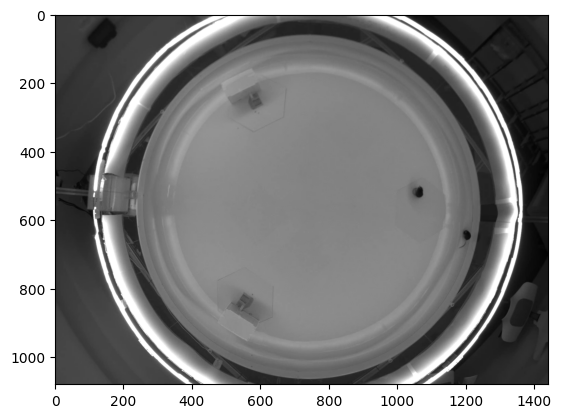

In [45]:
plt.imshow(video[94651][0])

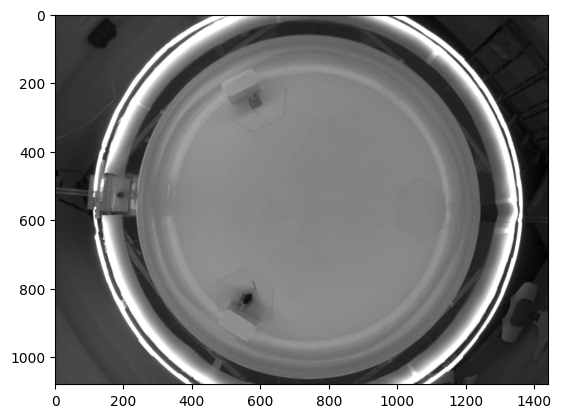

In [31]:
import matplotlib.pyplot as plt
plt.imshow(imgs[1])